_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [4]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

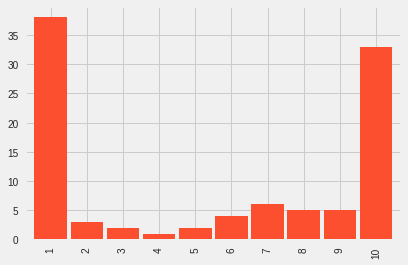

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

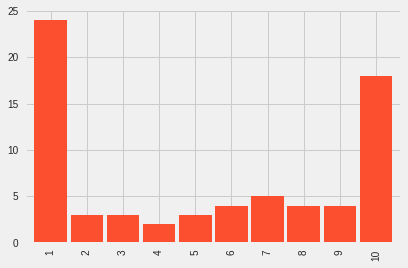

In [3]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

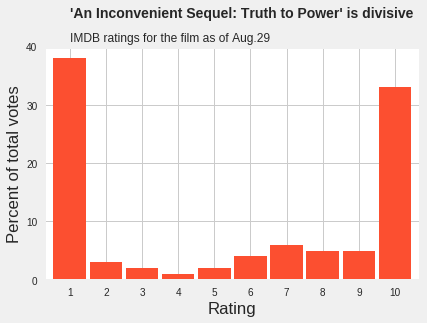

In [17]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index = range(1, 11))

ax = fake.plot.bar(color='C1', width=0.9)

#plt.ylabel('Percent of total votes', yticks=range(0, 50, 10))

#plt.xlabel('Rating')

ax.set(xlabel='Rating', ylabel='Percent of total votes', yticks=range(0, 50, 10))



ax.text(x=0, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=14, fontweight='bold')

ax.text(x=0, y=41, s="IMDB ratings for the film as of Aug.29", fontsize=12)
        
ax.tick_params(labelrotation=0)
   

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

pd.set_option('display.max_columns', 500)


In [22]:
df.shape

df.head()


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [23]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [25]:
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [26]:
df.set_index('timestamp', inplace=True)

df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [35]:
df['category'].value_counts()

Aged 18-29            4216
IMDb users            4216
Aged under 18         4216
Top 1000 voters       4216
Males                 4216
Males Aged 45+        4216
Females Aged 30-44    4216
Females Aged 18-29    4216
IMDb staff            4216
Males Aged 30-44      4216
Males under 18        4216
Females Aged 45+      4216
Males Aged 18-29      4216
Aged 30-44            4216
US users              4216
Aged 45+              4216
Females               4216
Non-US users          4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
lastday = df['2017-08-29']



In [39]:
lastday[lastday['category'] == 'IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:50:05.826082,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:00:05.483262,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:10:06.038644,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:20:05.807155,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


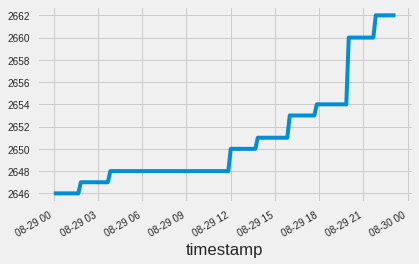

In [40]:
lastday[lastday['category'] == 'IMDb users'].respondents.plot()

In [0]:
final = lastday[lastday['category'] == 'IMDb users'].tail(1)

In [42]:
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [45]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns]



,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [46]:
data = final[pct_columns].T
data.index = range(1, 11)
data



timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


Text(-2, 42, 'IMDB ratings for the film as of Aug. 29')

<Figure size 432x288 with 0 Axes>

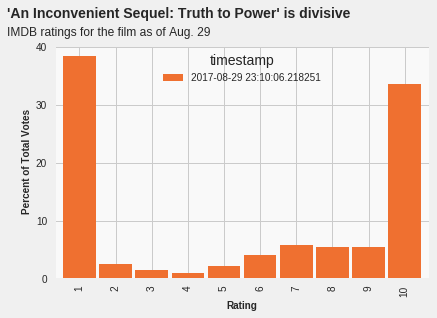

In [47]:
plt.style.use('fivethirtyeight')
fig = plt.figure()

ax = data.plot.bar(color='#ef7030', width=0.9)

ax.set(yticks=range(0, 50, 10),
       facecolor='#f9f9f9')
#ax.set_axis_bgcolor('#f9f9f9')
#ax.set_facecolor('white')
fig.patch.set_facecolor('#f9f9f9')

#plt.title("'An Inconvenient Sequel: Truth to Power' is divisive")
#plt.ylabel('Percent of total votes')
#plt.xlabel('Rating')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=14, fontweight='bold')
ax.text(x=-2, y=42, s="IMDB ratings for the film as of Aug. 29",
       fontsize=12)

In [48]:
import altair as alt
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

Chart({
  data: 'https://vega.github.io/vega-datasets/data/movies.json',
  encoding: EncodingWithFacet({
    x: X({
      bin: True,
      shorthand: 'IMDB_Rating:Q'
    }),
    y: Y({
      shorthand: 'count()'
    })
  }),
  mark: 'bar'
})

In [49]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()

RepeatChart({
  repeat: Repeat({
    column: ['Miles_per_Gallon', 'Acceleration', 'Horsepower'],
    row: ['Horsepower', 'Acceleration', 'Miles_per_Gallon']
  }),
  spec: Chart({
    data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
    0            12.0          8         307.0       130.0              18.0   
    1            11.5          8         350.0       165.0              15.0   
    2            11.0          8         318.0       150.0              18.0   
    3            12.0          8         304.0       150.0              16.0   
    4            10.5          8         302.0       140.0              17.0   
    5            10.0          8         429.0       198.0              15.0   
    6             9.0          8         454.0       220.0              14.0   
    7             8.5          8         440.0       215.0              14.0   
    8            10.0          8         455.0       225.0              14.0   
    9             8.5          8         390.0       190.0              15.0   
    10           17.5          4         133.0       115.0               NaN   
    11           11.5          8         350.0       165.0               NaN   
    12           11.0          8         351.0       153.0               NaN   
    13           10.5          8         383.0       175.0               NaN   
    14           11.0          8         360.0       175.0               NaN   
    15           10.0          8         383.0       170.0              15.0   
    16            8.0          8         340.0       160.0              14.0   
    17            8.0          8         302.0       140.0               NaN   
    18            9.5          8         400.0       150.0              15.0   
    19           10.0          8         455.0       225.0              14.0   
    20           15.0          4         113.0        95.0              24.0   
    21           15.5          6         198.0        95.0              22.0   
    22           15.5          6         199.0        97.0              18.0   
    23           16.0          6         200.0        85.0              21.0   
    24           14.5          4          97.0        88.0              27.0   
    25           20.5          4          97.0        46.0              26.0   
    26           17.5          4         110.0        87.0              25.0   
    27           14.5          4         107.0        90.0              24.0   
    28           17.5          4         104.0        95.0              25.0   
    29           12.5          4         121.0       113.0              26.0   
    ..            ...        ...           ...         ...               ...   
    376          18.6          4         112.0        88.0              27.0   
    377          18.0          4         112.0        88.0              34.0   
    378          16.2          4         112.0        85.0              31.0   
    379          16.0          4         135.0        84.0              29.0   
    380          18.0          4         151.0        90.0              27.0   
    381          16.4          4         140.0        92.0              24.0   
    382          20.5          4         151.0         NaN              23.0   
    383          15.3          4         105.0        74.0              36.0   
    384          18.2          4          91.0        68.0              37.0   
    385          17.6          4          91.0        68.0              31.0   
    386          14.7          4         105.0        63.0              38.0   
    387          17.3          4          98.0        70.0              36.0   
    388          14.5          4         120.0        88.0              36.0   
    389          14.5          4         107.0        75.0              36.0   
    390          16.9          4         108.0        70.0              34.0   
    391          15.0          4          91.0        6

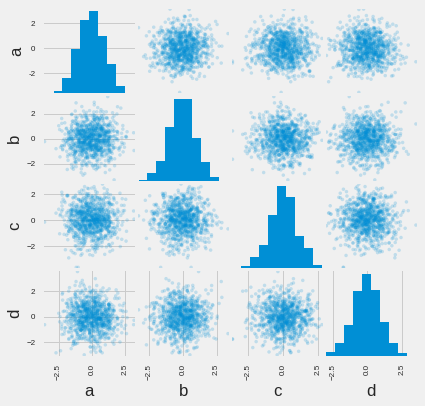

In [50]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist');



# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!







